# Oscilações forçadas

Série de Fourier para a força externa

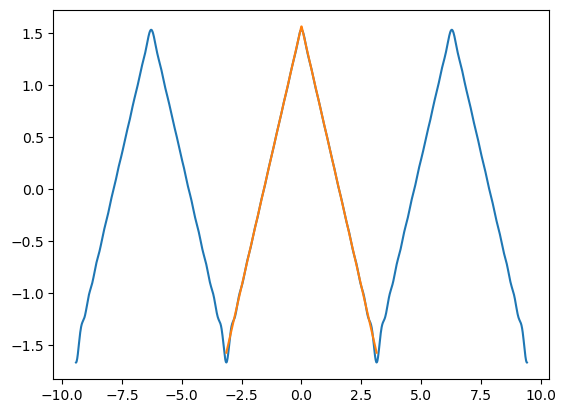

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#semi-período
L = np.pi

#número de cosenos e senos na série 
num_termos = 20

#condições iniciais
x0 = 1

v0 = 0


t = np.linspace(-L,L,500)

x = (t+np.pi/2)*(np.heaviside(t+np.pi,1)-np.heaviside(t,0))+(-t+np.pi/2)*(np.heaviside(t,0)-np.heaviside(t-np.pi,0))

tt = np.linspace(-3*L,3*L,1500)

def an(n):
    c = x*np.cos(n*np.pi*t/L)
    value = c.sum()/c.size
    if n==0:
        value=value
    else:
        value=value*2
    return value
   
def bn(n):
    c = x*np.sin(n*np.pi*t/L)
    return c.sum()/c.size*2

def f(t, N):
    fun=0*t
    for i in range(N+1):
        fun = fun+an(i)*np.cos(i*np.pi*t/L)+bn(i)*np.sin(i*np.pi*t/L)
    return fun


x2 = f(tt, num_termos)

plt.plot(tt, x2)+plt.plot(t, x)
plt.show()

In [2]:
%%html
<iframe style="margin-top:0px;margin-left:-20px;" src="https://trinket.io/embed/python3" width="1200" height="600"></iframe>

Calcular a solução particular x_p

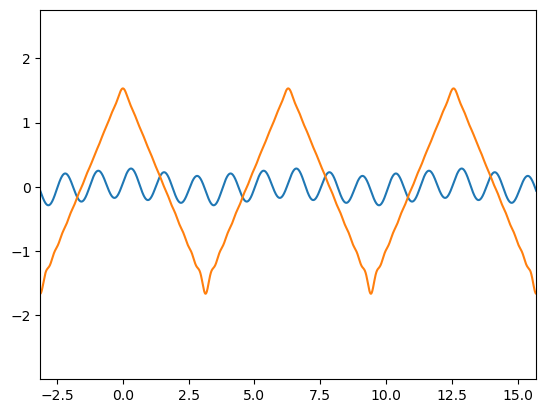

In [3]:
import numpy as np
import matplotlib.pyplot as plt

#semi-período
L = np.pi

#número de cosenos e senos na série 
num_termos = 20

#condições iniciais
x0 = 1

v0 = 0

# extendendo o período da função
var = 5


t = np.linspace(-L,L,500)

x = (t+np.pi/2)*(np.heaviside(t+np.pi,1)-np.heaviside(t,0))+(-t+np.pi/2)*(np.heaviside(t,0)-np.heaviside(t-np.pi,0))

tt = np.linspace(-3*L,3*L,1500)

def an(n):
    c = x*np.cos(n*np.pi*t/L)
    value = c.sum()/c.size
    if n==0:
        value=value
    else:
        value=value*2
    return value
   
def bn(n):
    c = x*np.sin(n*np.pi*t/L)
    return c.sum()/c.size*2

def f(t, N):
    fun=0*t
    for i in range(N+1):
        fun = fun+an(i)*np.cos(i*np.pi*t/L)+bn(i)*np.sin(i*np.pi*t/L)
    return fun


x2 = f(tt, num_termos)

# massa
m = 1

# constante de amortecimento
c = 0.05

# constante da mola
k = 25

# coeficientes da solução particular
A0 = an(0)/k

def Matriz(n):
    Matriz = np.array([[k-m*n**2*np.pi**2/L**2,c*n*np.pi/L],[-c*n*np.pi/L,k-m*n**2*np.pi**2/L**2]])
    return Matriz

def f_P(t, N):
    fun=0*t+A0
    for i in range(1,N+1):
        Mat = Matriz(i)
        B = np.array([an(i),bn(i)])
        An,Bn = np.linalg.solve(Mat,B)
        fun = fun+An*np.cos(i*np.pi*t/L)+Bn*np.sin(i*np.pi*t/L)
    return fun


tt = np.linspace(-L,var*L,5000)
x2 = f(tt, num_termos)
x_P = f_P(tt, num_termos)

plt.axis([-L,var*L,1.8*x2.min(),1.8*x2.max()])
plt.plot(tt, x_P)+plt.plot(tt, x2)
plt.show()

In [4]:
%%html
<iframe style="margin-top:0px;margin-left:-20px;" src="https://trinket.io/embed/python3" width="1200" height="600"></iframe>

Podemos usar a célula abaixo para resolver a ED0 homogênea associada

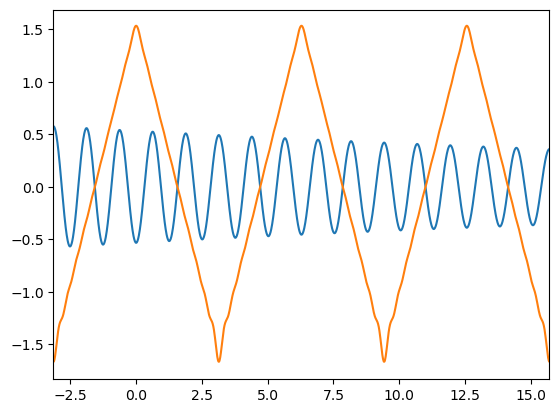

In [5]:
import numpy as np
import matplotlib.pyplot as plt

#semi-período
L = np.pi

#número de cosenos e senos na série 
num_termos = 20

#condições iniciais
x0 = 1

v0 = 0

# extendendo o período da função
var = 5

# massa
m = 1

# constante de amortecimento
c = 0.05

# constante da mola
k = 25


t = np.linspace(-L,L,500)

x = (t+np.pi/2)*(np.heaviside(t+np.pi,1)-np.heaviside(t,0))+(-t+np.pi/2)*(np.heaviside(t,0)-np.heaviside(t-np.pi,0))

tt = np.linspace(-L,var*L,1500)

def an(n):
    c = x*np.cos(n*np.pi*t/L)
    value = c.sum()/c.size
    if n==0:
        value=value
    else:
        value=value*2
    return value
   
def bn(n):
    c = x*np.sin(n*np.pi*t/L)
    return c.sum()/c.size*2

def f(t, N):
    fun=0*t
    for i in range(N+1):
        fun = fun+an(i)*np.cos(i*np.pi*t/L)+bn(i)*np.sin(i*np.pi*t/L)
    return fun


x2 = f(tt, num_termos)


## condições iniciais considerando

x_H0 = x0-f(0, 20)
v_H0 = v0-(f(-0.01, 20)-f(0.01, 20))*200

## 

def solucao_homogenea(m,c,k):
    delta = c**2 - 4*m*k
    if delta > 0:
        value1 = -c/(2*m) + np.sqrt(delta)/(2*m)
        value2 = -c/(2*m) - np.sqrt(delta)/(2*m)
        Mat = np.array([[1,1],[value1,value2]])
        B = np.array([x_H0,v_H0])
        alpha, beta = np.linalg.solve(Mat,B)
        func = alpha*np.exp(value1*tt) + beta*np.exp(value2*tt)
    if delta == 0:
        value1 = -c/(2*m)
        Mat = np.array([[1,0],[value1,1]])
        B = np.array([x_H0,v_H0])
        alpha, beta = np.linalg.solve(Mat,B)
        func = alpha*np.exp(value1*tt) + beta*t*np.exp(value1*tt)
    if delta < 0:
        valueR = -c/(2*m)
        valueI = np.sqrt(-delta)/(2*m)
        Mat = np.array([[1,0],[valueR,valueI]])
        B = np.array([x_H0,v_H0])
        alpha, beta = np.linalg.solve(Mat,B)
        func = alpha*np.exp(valueR*tt)*np.cos(valueI*tt) + beta*np.exp(valueR*tt)*np.sin(valueI*tt)
    return func
    
x_H = solucao_homogenea(m,c,k)

plt.axis([-L,var*L,1.1*x2.min(),1.1*x2.max()])
plt.plot(tt, x_H)+plt.plot(tt, x2)
plt.show()


In [6]:
%%html
<iframe style="margin-top:0px;margin-left:-20px;" src="https://trinket.io/embed/python3" width="1200" height="600"></iframe>

Solução homogênea mais particular

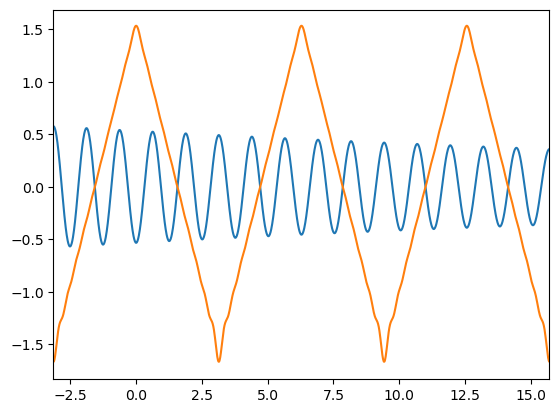

In [7]:
import numpy as np
import matplotlib.pyplot as plt

#semi-período
L = np.pi

#número de cosenos e senos na série 
num_termos = 20

#condições iniciais
x0 = 1

v0 = 0

# extendendo o período da função
var = 5

# massa
m = 1

# constante de amortecimento
c = 0.05

# constante da mola
k = 25


t = np.linspace(-L,L,500)

x = (t+np.pi/2)*(np.heaviside(t+np.pi,1)-np.heaviside(t,0))+(-t+np.pi/2)*(np.heaviside(t,0)-np.heaviside(t-np.pi,0))

tt = np.linspace(-L,var*L,1500)

def an(n):
    c = x*np.cos(n*np.pi*t/L)
    value = c.sum()/c.size
    if n==0:
        value=value
    else:
        value=value*2
    return value
   
def bn(n):
    c = x*np.sin(n*np.pi*t/L)
    return c.sum()/c.size*2

def f(t, N):
    fun=0*t
    for i in range(N+1):
        fun = fun+an(i)*np.cos(i*np.pi*t/L)+bn(i)*np.sin(i*np.pi*t/L)
    return fun


x2 = f(tt, num_termos)


## condições iniciais considerando

x_H0 = x0-f(0, 20)
v_H0 = v0-(f(-0.01, 20)-f(0.01, 20))*200

## 

def solucao_homogenea(m,c,k):
    delta = c**2 - 4*m*k
    if delta > 0:
        value1 = -c/(2*m) + np.sqrt(delta)/(2*m)
        value2 = -c/(2*m) - np.sqrt(delta)/(2*m)
        Mat = np.array([[1,1],[value1,value2]])
        B = np.array([x_H0,v_H0])
        alpha, beta = np.linalg.solve(Mat,B)
        func = alpha*np.exp(value1*tt) + beta*np.exp(value2*tt)
    if delta == 0:
        value1 = -c/(2*m)
        Mat = np.array([[1,0],[value1,1]])
        B = np.array([x_H0,v_H0])
        alpha, beta = np.linalg.solve(Mat,B)
        func = alpha*np.exp(value1*tt) + beta*t*np.exp(value1*tt)
    if delta < 0:
        valueR = -c/(2*m)
        valueI = np.sqrt(-delta)/(2*m)
        Mat = np.array([[1,0],[valueR,valueI]])
        B = np.array([x_H0,v_H0])
        alpha, beta = np.linalg.solve(Mat,B)
        func = alpha*np.exp(valueR*tt)*np.cos(valueI*tt) + beta*np.exp(valueR*tt)*np.sin(valueI*tt)
    return func
    
x_H = solucao_homogenea(m,c,k)


# coeficientes da solução particular
A0 = an(0)/k

def Matriz(n):
    Matriz = np.array([[k-m*n**2*np.pi**2/L**2,c*n*np.pi/L],[-c*n*np.pi/L,k-m*n**2*np.pi**2/L**2]])
    return Matriz

def f_P(t, N):
    fun=0*t+A0
    for i in range(1,N+1):
        Mat = Matriz(i)
        B = np.array([an(i),bn(i)])
        An,Bn = np.linalg.solve(Mat,B)
        fun = fun+An*np.cos(i*np.pi*t/L)+Bn*np.sin(i*np.pi*t/L)
    return fun


x2 = f(tt, num_termos)
x_P = f_P(tt, num_termos)

plt.axis([-L,var*L,1.1*x2.min(),1.1*x2.max()])
plt.plot(tt, x_H)+plt.plot(tt, x2)
plt.show()


In [8]:
%%html
<iframe style="margin-top:0px;margin-left:-20px;" src="https://trinket.io/embed/python3" width="1200" height="600"></iframe>

In [9]:
mola_crit = (1+c**2)/4/m
mola_crit

0.250625